## 1. 라이브러리 불러오기

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from data_loader import get_loaders     # data_loader.py

## 2. 데이터셋 및 DataLoader 구성
- `data_loader.py` 모듈 불러오기

In [7]:
train_loader, test_loader = get_loaders(batch_size=64)

## 3. MLP 모델 정의 
- (입력층 → 은닉층 → 출력층)
- FashionMNIST는 28x28 = 784개의 픽셀
- 출력 클래스는 10개

In [8]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),            # 28x28 이미지를 784벡터로 펼침
            nn.Linear(784, 256),     # 은닉층 1
            nn.ReLU(),
            nn.Linear(256, 128),     # 은닉층 2
            nn.ReLU(),
            nn.Linear(128, 10)       # 츨력층 (10개 클래스)
        )

    def forward(self, x):
        return self.model(x)

model = MLP()

## 4. 손실 함수와 옵티마이저 정의
- `CrossEntropyLoss` 다중 클래스 분류에 가장 일반적으로 사용
- `SGD` 확률적 경사 하강법, 기본적인 옵티마이저

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

## 5. 학습 루프 설정
- 여러 epoch를 거쳐 모델 학습시키고 손실(loss)을 추적

In [16]:
epochs = 5
train_loss_list = []
test_acc_list = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        # 1) 순전파
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 2) 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 3) 통계
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(train_loader)
    train_loss_list.append(avg_loss)

    # 평가
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:  
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
    accuracy = correct / total * 100
    test_acc_list.append(accuracy)

    print(f"[{epoch+1}] Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

[1] Loss: 0.5398, Test Accuracy: 80.91%
[2] Loss: 0.5029, Test Accuracy: 81.78%
[3] Loss: 0.4781, Test Accuracy: 82.53%
[4] Loss: 0.4616, Test Accuracy: 81.83%
[5] Loss: 0.4468, Test Accuracy: 83.51%


## 6. 시각화

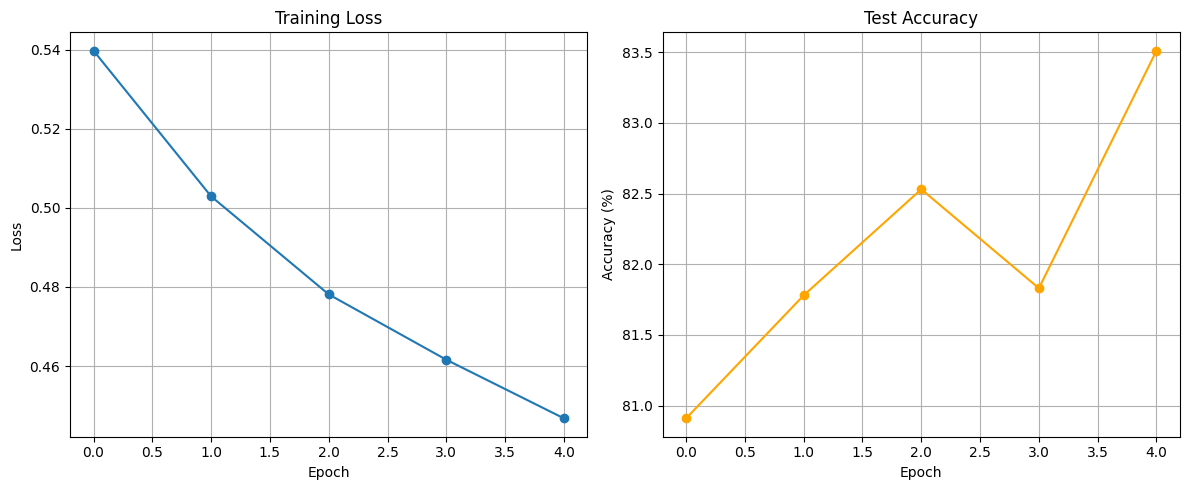

In [19]:
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, marker='o', label='Train Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(test_acc_list, marker='o', color='orange', label='Test Accuracy')
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)

plt.tight_layout()
plt.savefig("mlp_train_result.png")
plt.show()